In [53]:
import matplotlib.pyplot as plt

from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from wrangle import wrangle_telco
import prepare

In [54]:
df = wrangle_telco()
df.head()

,monthly_charges,tenure,total_charges
0,109.70,71,7904.25
1,84.65,63,5377.80
2,90.45,65,5957.90
3,45.20,54,2460.55
4,116.80,72,8456.75


In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_charges,1695.0,60.770413,34.678865,18.4,24.025,64.35,90.45,118.75
tenure,1695.0,56.735103,18.209363,0.0,48.000,64.00,71.00,72.00
total_charges,1695.0,3706.934336,2579.517834,0.0,1269.675,3593.80,5988.80,8672.45


In [56]:
def telco_split(df):
    train_and_validate, test = train_test_split(df, test_size=.12, random_state=123)
    train, validate = train_test_split(train_and_validate, test_size=.12, random_state=123)
    return train, validate, test

train, validate, test = telco_split(df)

train.shape, test.shape, validate.shape

((1312, 3), (204, 3), (179, 3))

1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way you find helpful.

#### Min-Max Scaler

In [57]:
# 1. create the object
scaler = sklearn.preprocessing.MinMaxScaler()

# 2. fit the object
scaler.fit(telco[['total_charges']])

# 3. use the object
train['total_charges_scaled'] = scaler.transform(train[['total_charges']])
test['total_charges_scaled'] = scaler.transform(test[['total_charges']])
validate['total_charges_scaled'] = scaler.transform(validate[['total_charges']])
train.head()

,monthly_charges,tenure,total_charges,total_charges_scaled
1529,100.20,71,7209.00,0.831253
1420,81.65,45,3618.70,0.417264
949,81.00,46,3846.35,0.443514
142,111.25,71,7984.15,0.920634
551,21.25,30,711.90,0.082088


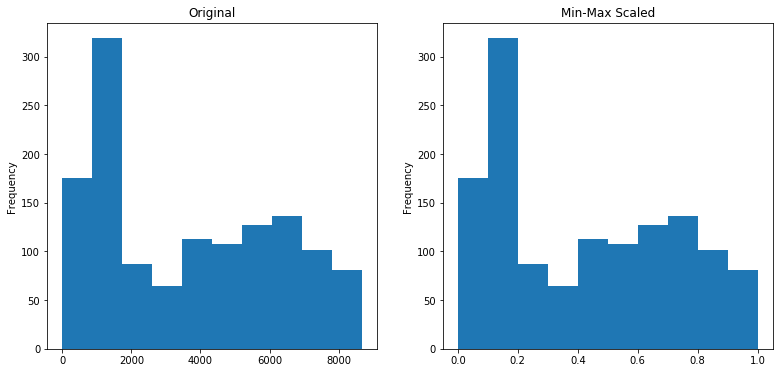

In [58]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_charges.plot.hist(title='Original')
plt.subplot(122)
train.total_charges_scaled.plot.hist(title='Min-Max Scaled')

2. Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?

In [59]:
scaler.inverse_transform(train[['total_charges_scaled']])

array([[7209.  ],
       [3618.7 ],
       [3846.35],
       ...,
       [1050.5 ],
       [6362.35],
       [6093.3 ]])

3. Read the documentation for sklearn's `QuantileTransformer`. Use `normal` for the `output_distribution` and apply this scaler to your data. Visualize the result of your data scaling.

#### Quantile Scaler (non-linear)

In [30]:
# 1. create the object
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
# 2. fit the object
scaler.fit(train[['total_charges']])
# 3. use the object
train['total_charges_scaled'] = scaler.transform(train[['total_charges']])
test['total_charges_scaled'] = scaler.transform(test[['total_charges']])
validate['total_charges_scaled'] = scaler.transform(validate[['total_charges']])
train.head()

,monthly_charges,tenure,total_charges,total_charges_scaled
1529,100.20,71,7209.00,1.195280
1420,81.65,45,3618.70,0.016247
949,81.00,46,3846.35,0.061586
142,111.25,71,7984.15,1.711518
551,21.25,30,711.90,-1.291714


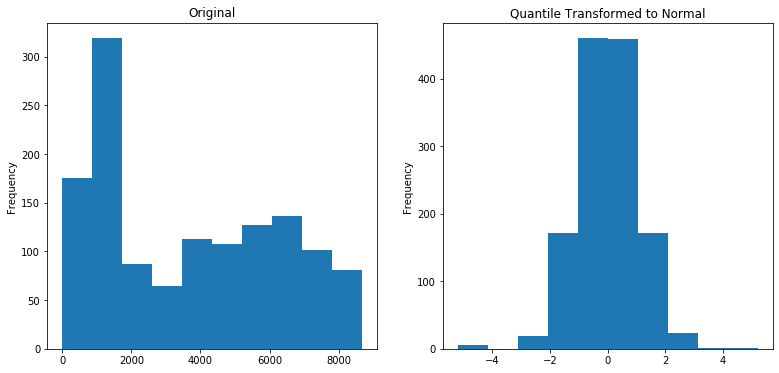

In [32]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_charges.plot.hist(title='Original')
plt.subplot(122)
train.total_charges_scaled.plot.hist(title='Quantile Transformed to Normal')

4. Use the `QuantileTransformer`, but omit the `output_distribution` argument. Visualize your results. What do you notice?

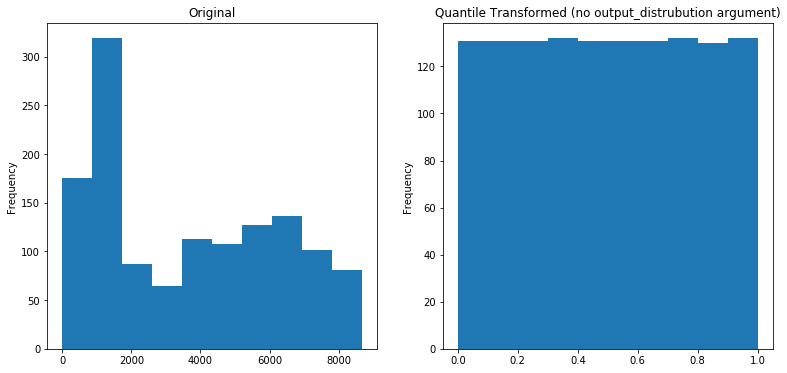

In [33]:
# 1. create the object
scaler = sklearn.preprocessing.QuantileTransformer()
# 2. fit the object
scaler.fit(train[['total_charges']])
# 3. use the object
train['total_charges_scaled'] = scaler.transform(train[['total_charges']])
test['total_charges_scaled'] = scaler.transform(test[['total_charges']])
validate['total_charges_scaled'] = scaler.transform(validate[['total_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_charges.plot.hist(title='Original')
plt.subplot(122)
train.total_charges_scaled.plot.hist(title='Quantile Transformed (no output_distrubution argument)')

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your `prepare.py` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [40]:
def add_scaled_columns(train, validate, test, scaler, columns_to_scale):
    new_column_names = [c + '_scales' for c in columns_to_scale]
    scaler.fit(train[columns_to_scale])
    
    train = pd.concat([
        train, pd.DataFrame(scaler.transform(train[columns_to_scale]), 
                            columns=new_column_names, 
                            index=train.index),], axis=1)
    validate = pd.concat([
        validate, pd.DataFrame(scaler.transform(validate[columns_to_scale]), 
                            columns=new_column_names, 
                            index=validate.index),], axis=1)
    test = pd.concat([
        test, pd.DataFrame(scaler.transform(test[columns_to_scale]), 
                            columns=new_column_names, 
                            index=test.index),], axis=1)
    return train, validate, test

In [41]:
#manual function call
train, validate, test = add_scaled_columns(
    train,
    validate,
    test,
    scaler=sklearn.preprocessing.MinMaxScaler(),
    columns_to_scale=['monthly_charges', 'total_charges', 'tenure'],
)
train.head()

,monthly_charges,tenure,total_charges,monthly_charges_scales,total_charges_scales,tenure_scales
1529,100.20,71,7209.00,0.814870,0.831253,0.986111
1420,81.65,45,3618.70,0.629741,0.417264,0.625000
949,81.00,46,3846.35,0.623253,0.443514,0.638889
142,111.25,71,7984.15,0.925150,0.920634,0.986111
551,21.25,30,711.90,0.026946,0.082088,0.416667


In [51]:
#add scaled datasets (train,test, validate) from prepare file
train, validate, test = prepare.scale_telco_data()
train.head()

,monthly_charges,tenure,total_charges,monthly_charges_scales,tenure_scales,total_charges_scales
1529,100.20,71,7209.00,0.814870,0.986111,0.831253
1420,81.65,45,3618.70,0.629741,0.625000,0.417264
949,81.00,46,3846.35,0.623253,0.638889,0.443514
142,111.25,71,7984.15,0.925150,0.986111,0.920634
551,21.25,30,711.90,0.026946,0.416667,0.082088
